In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
from multiprocessing import Pool
# from profilestats import profile
from scipy.stats import binned_statistic
from funcs.analysis.analysis import *
%matplotlib inline

def reader(n_subarray):
    return pd.read_csv('../data/merged/{}/r_band/with_ssa/lc_{}.csv'.format(obj,n_subarray), comment='#', index_col = ID, dtype = {'catalogue': np.uint8, 'mag': np.float32, 'magerr': np.float32, 'mjd': np.float64, ID: np.uint32})

In [2]:
obj = 'qsos'
ID  = 'uid'
band = 'r'
redshift_bool = True

# obj = 'calibStars'
# ID  = 'uid_s'
# band = 'r'
# redshift_bool = False

# Here we load the analysis class. This has various attibutes and methods outlined in /funcs/analysis.py
# Examples:
# Photometry is in dr.df

# Grouped statistics is in dr.grouped
# DR12 VAC properties are in dr.properties
dr = analysis(ID, obj)

In [3]:
dr.read_in(reader, redshift=redshift_bool)
dr.band = band
dr.group(keys = ['uid'],read_in=True, redshift=redshift_bool, survey = 'all')

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
dr.df_grouped

,n_tot,mjd_min,mjd_max,mjd_ptp,mag_min,mag_max,mag_mean,mag_med,mag_mean_native,mag_med_native,...,magerr_max,magerr_mean,magerr_med,magerr_opt_std,redshift,mjd_ptp_rf,mean_gi,mean_gr,mean_ri,mean_iz
uid,,,,,,,,,,,,,,,,,,,,,
1,22,54741.371761,58475.144699,3733.772938,20.648459,22.071905,21.342093,21.343982,21.357530,21.362600,...,0.206130,0.175084,0.175763,0.036470,2.309000,1128.368975,-0.017940,-0.161130,0.143190,0.55434
2,23,54747.352476,58487.101042,3739.748566,20.885573,21.628172,21.204215,21.304075,21.193358,21.304076,...,0.218896,0.135964,0.123438,0.023076,2.103120,1205.157456,0.333530,0.277700,0.055830,0.49685
3,36,52170.284887,58487.100579,6316.815692,20.204323,21.184834,20.776381,20.794039,20.748879,20.759322,...,0.204730,0.148570,0.169096,0.018146,2.497000,1806.352786,0.441390,0.337550,0.103840,0.12305
4,52,54764.193704,58655.441829,3891.248124,19.568613,20.046188,19.814314,19.823789,19.788165,19.797930,...,0.108703,0.079946,0.094931,0.007432,1.619000,1485.776298,0.540950,0.319930,0.221020,0.13703
5,52,53271.313403,58657.436319,5386.122916,20.352556,21.183097,20.822959,20.883501,20.786568,20.838584,...,0.184414,0.139620,0.152868,0.015900,1.616210,2058.749985,1.072330,0.579470,0.492860,0.34408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526352,32,52909.369624,58486.100787,5576.731163,20.730858,21.882521,21.302349,21.360371,21.304764,21.361765,...,0.221980,0.170418,0.178788,0.024806,2.452000,1615.507289,0.070147,-0.038555,0.108702,0.48022
526353,75,52909.353868,58657.434954,5748.081086,19.774813,20.351723,20.005418,20.000070,19.952909,19.936472,...,0.110659,0.083262,0.090503,0.007625,3.109000,1398.900240,0.870490,0.623310,0.247180,0.22952
526354,62,54741.213069,58655.441829,3914.228759,18.583073,19.210831,19.008061,19.030578,18.985963,19.019038,...,0.068640,0.048165,0.058919,0.003991,1.233161,1752.774916,0.239240,0.282110,-0.042870,-0.04979


In [5]:
dr.df_grouped['n_prod'] = np.prod(dr.df_grouped.iloc[:,1:6].values, axis=1)

In [6]:
uids = dr.df_grouped.sort_values('n_prod', ascending=False).head(20).index

(<Figure size 1800x4320 with 20 Axes>,
 array([<AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <AxesSubplot:xlabel='mjd', ylabel='mag'>,
        <Ax

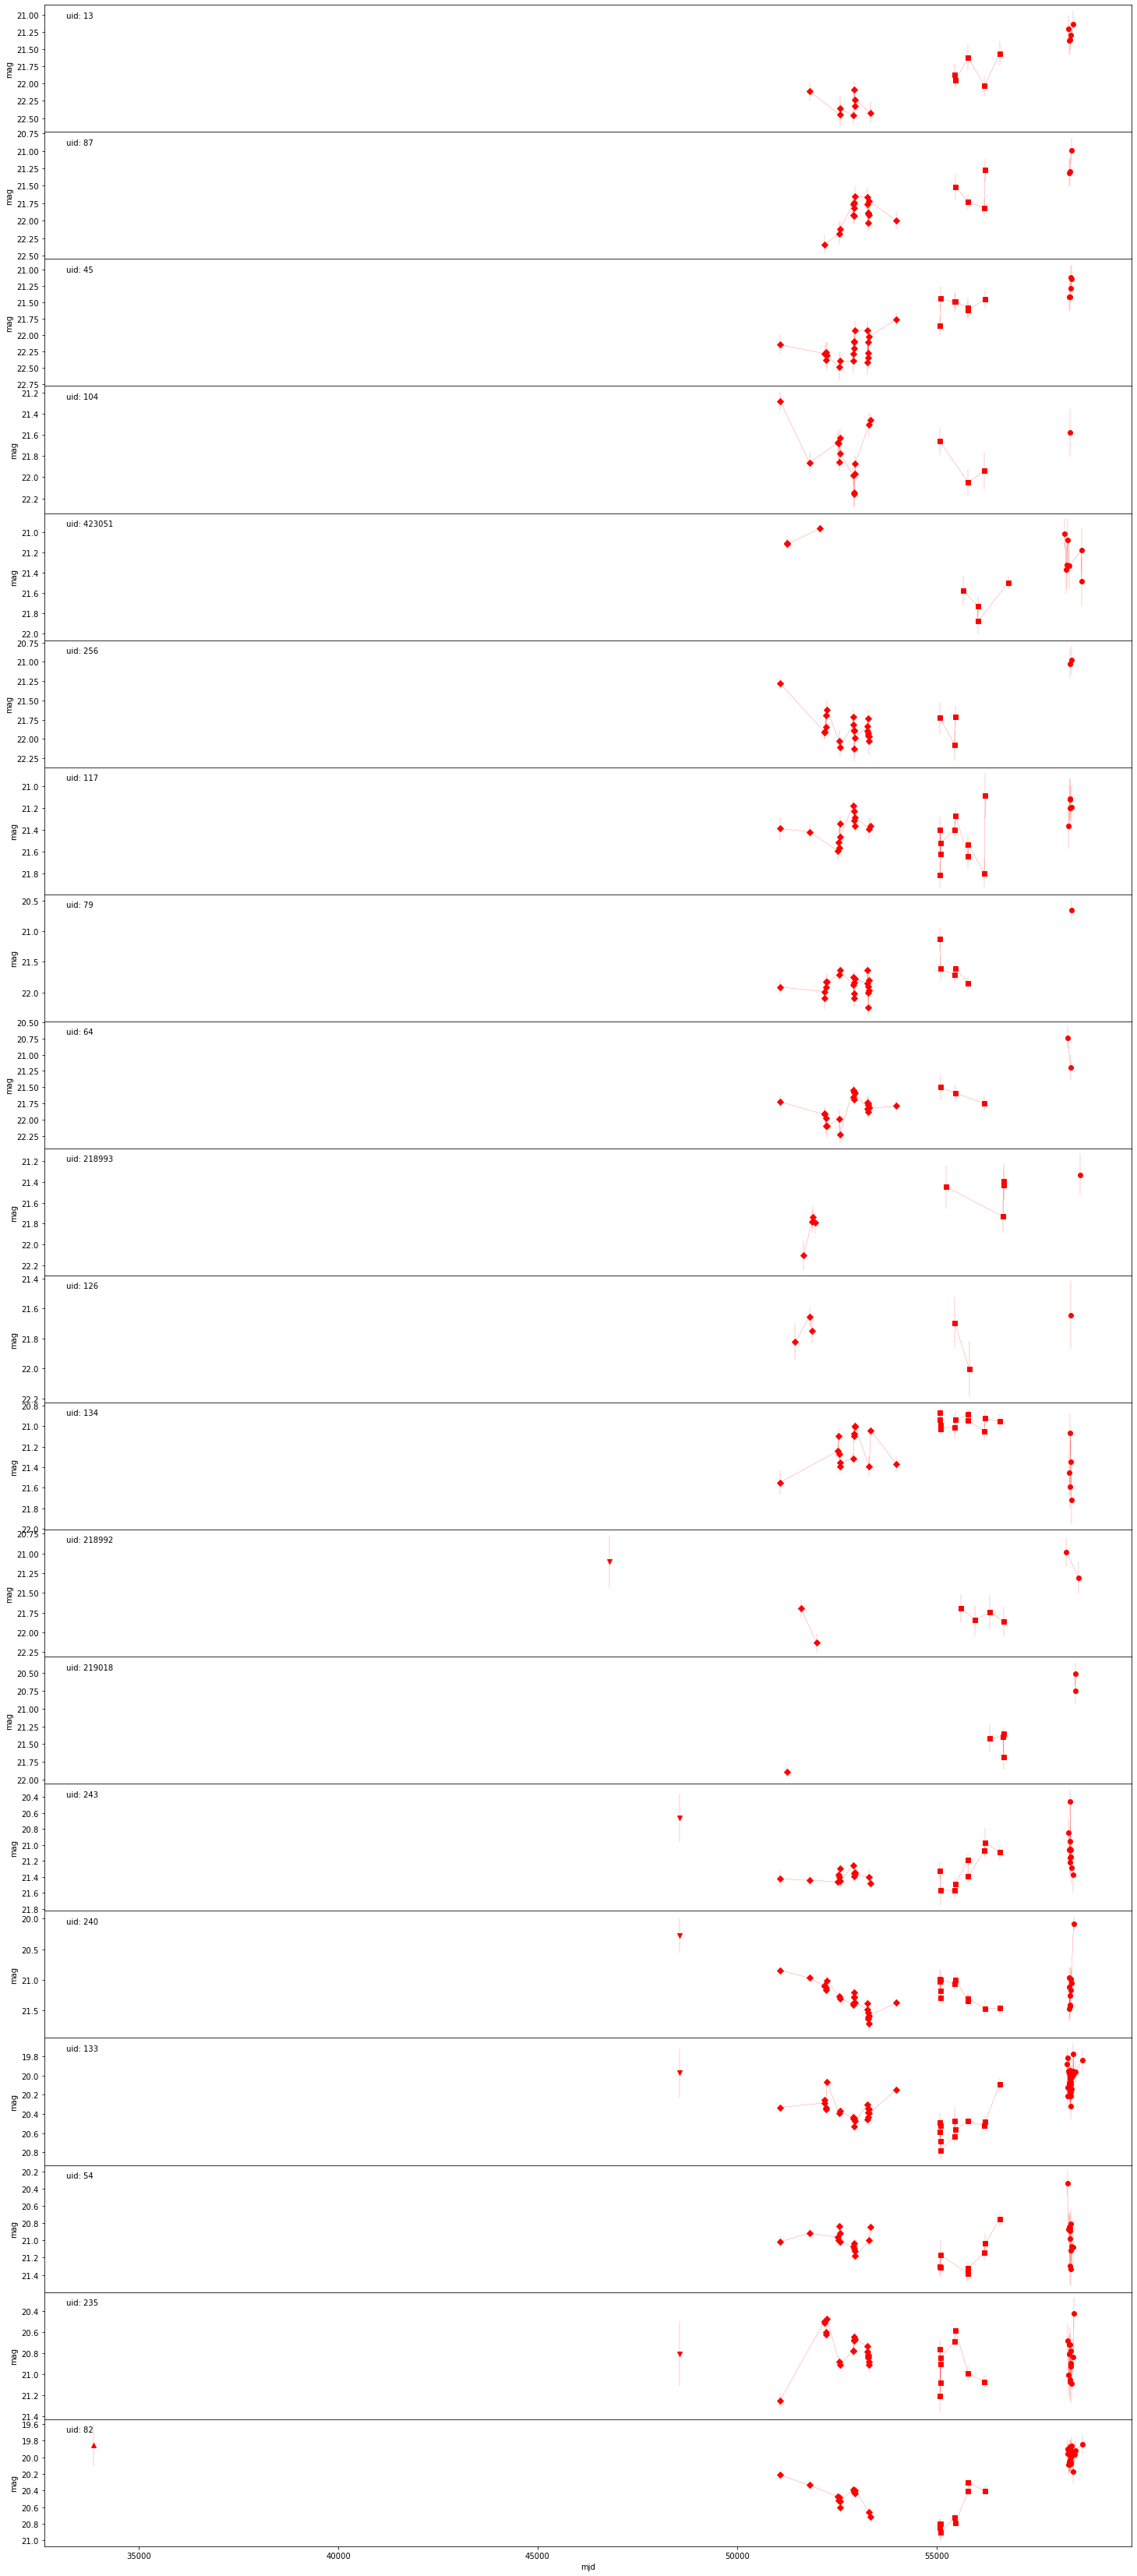

In [9]:
dr.plot_series(uids=uids, filtercodes='r')#, xlim=[58000, 59000])

In [4]:
dr.df['mjd'].min()

33444.0

<AxesSubplot:>

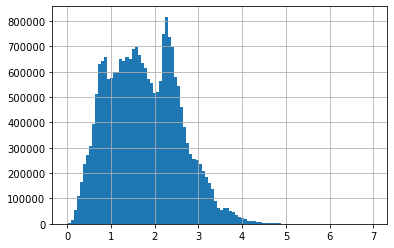

In [25]:
dr.df['redshift'].hist(bins=100)

In [21]:
dr.df[dr.df['catalogue']==1]

,catalogue,mjd,mag,magerr,redshift,mjd_rf
uid,,,,,,
14,1,34989.0,20.105627,0.261559,2.5380,9889.485585
14,1,34989.0,20.105627,0.261559,2.5380,9889.485585
16,1,33868.0,20.209654,0.270875,2.1630,10707.556118
49,1,34987.0,20.471062,0.288495,2.7150,9417.765814
56,1,34989.0,20.108685,0.263787,2.0890,11326.966656
...,...,...,...,...,...,...
526338,1,33868.0,19.174202,0.199585,1.6937,12573.040799
526339,1,34987.0,19.539745,0.226048,2.5530,9847.171404
526340,1,34987.0,17.767298,0.168935,1.2834,15322.326355


In [31]:
dr.df['mag'].max()

24.965011971831803

In [4]:
dr.group(keys = ['uid'],read_in=True, redshift=redshift_bool, survey='SSS')

(array([2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 7.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 8.000e+00, 7.000e+00,
        6.000e+00, 5.000e+00, 7.000e+00, 8.000e+00, 4.000e+00, 7.000e+00,
        4.000e+00, 1.700e+01, 1.600e+01, 1.200e+01, 1.000e+01, 9.000e+00,
        1.800e+01, 1.400e+01, 2.100e+01, 2.000e+01, 2.000e+01, 2.300e+01,
        2.300e+01, 2.400e+01, 2.200e+01, 3.000e+01, 3.900e+01, 3.700e+01,
        4.800e+01, 4.500e+01, 5.300e+01, 4.200e+01, 6.700e+01, 6.700e+01,
        6.700e+01, 7.500e+01, 8.200e+01, 6.900e+01, 1.020e+02, 1.010e+02,
        1.070e+02, 1.120e+02, 1.200e+02, 1.390e+02, 1.430e+02, 1.410e+02,
        1.570e+02, 1.680e+02, 1.980e+02, 2.060e+02, 2.310e+02, 2.680e+02,
        2.500e+02, 2.880e+02, 3.250e+02, 3.910e+02, 3.380e+02, 3.720e+02,
        3.980e+02, 4.650e+02, 5.130e+02, 5.430e+02, 5.810e+02, 6.590e+02,
        6.640e+02, 7.150e+02, 7.720e+0

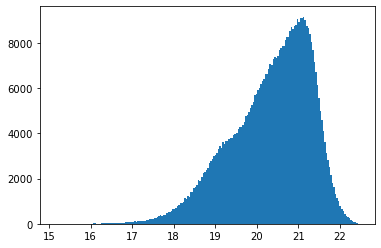

In [10]:
plt.hist(dr.df_grouped['mag_mean'], bins=200)

In [6]:
dr.df_grouped['mag_mean'].max()

22.471048974990843

In [7]:
dr.df['catalogue'].unique()

array([ 5,  7, 11,  3,  1], dtype=uint8)

In [18]:
dr.df.loc[5]

,catalogue,mjd,mag,magerr,redshift,mjd_rf
uid,,,,,,
5,5,53271.313403,20.911011,0.034583,1.61621,20362.015012
5,7,55456.513728,21.050753,0.056347,1.61621,21197.269091
5,7,55824.528083,20.972691,0.058246,1.61621,21337.936053
5,7,55825.508168,20.908619,0.078163,1.61621,21338.310673
5,7,56259.276643,20.936819,0.093033,1.61621,21504.110982
5,7,56532.444306,20.810614,0.076409,1.61621,21608.524478
5,7,56543.586252,20.585075,0.091137,1.61621,21612.783289
5,7,56932.321700,20.911575,0.045477,1.61621,21761.370521
5,7,56941.509690,20.496729,0.107472,1.61621,21764.882468


In [12]:
mask = dr.df.duplicated()

In [16]:
dr.df[dr.df['catalogue']==1]

,catalogue,mjd,mag,magerr,redshift,mjd_rf
uid,,,,,,
5,1,46526.995000,20.623573,0.311044,1.616210,17784.118884
6,1,45202.285996,19.725288,0.203230,1.360000,19153.511015
8,1,46356.174998,19.451329,0.272158,3.090000,11334.028117
9,1,47680.227005,20.511793,0.248934,0.935380,24636.109400
14,1,46824.616001,19.794878,0.270740,2.538000,13234.769927
...,...,...,...,...,...,...
526351,1,48025.006004,20.877028,0.287415,1.490065,19286.649863
526353,1,47006.641507,19.939639,0.256495,3.109000,11439.922489
526354,1,46841.698001,18.629981,0.173728,1.233161,20975.512246


In [9]:
dr.df[dr.df['catalogue']==5]

,catalogue,mjd,mag,magerr,redshift,mjd_rf
uid,,,,,,
1,5,54741.371761,22.071905,0.115390,2.309000,16543.176718
2,5,54747.352476,21.339039,0.071079,2.103120,17642.678073
3,5,52170.284887,20.884848,0.037222,2.497000,14918.583039
4,5,54764.193704,19.624706,0.023668,1.619000,20910.345057
5,5,53271.313403,20.911011,0.034583,1.616210,20362.015012
...,...,...,...,...,...,...
526354,5,54741.213069,18.610668,0.015523,1.233161,24512.881345
526355,5,55119.365472,20.268463,0.029840,2.009941,18312.441109
526356,5,52909.353868,20.566013,0.028401,2.375000,15676.845590


([<matplotlib.axis.YTick at 0x7ff22ab1c0f0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

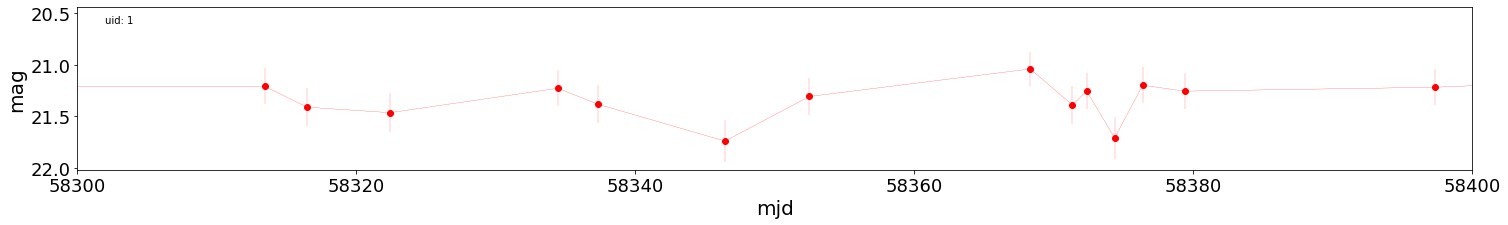

In [6]:
fig, ax = dr.plot_series([1], survey=3, filtercodes='r')
ax[0].set(xlim=[58300, 58400])
plt.xlabel('mjd',fontsize=20)
plt.ylabel('mag',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks([22,21.5,21,20.5],fontsize=18)

In [7]:
dr.df[['mjd','mag']].values.shape

(400, 2)

In [9]:
dr.df_grouped

,n_tot,n_sdss,n_ps,n_ztf,mjd_min,mjd_max,mjd_ptp,mag_min,mag_max,mag_mean,mag_med,mag_opt_mean,mag_opt_mean_flux,mag_std,magerr_max,magerr_mean,magerr_med,magerr_opt_std,redshift,mjd_ptp_rf
uid,,,,,,,,,,,,,,,,,,,,
1,21,0,4,17,55806.591422,58475.144699,2668.553277,20.648458,21.771994,21.317080,21.306569,21.315989,21.423073,0.271061,0.206130,0.177927,0.176572,0.038441,2.309000,806.453091
2,22,0,14,8,55452.480474,58487.101042,3034.620567,20.885572,21.628172,21.198467,21.271762,21.135025,21.188592,0.209168,0.218896,0.138913,0.124060,0.024397,2.103120,977.925531
3,35,0,8,27,55090.497735,58487.100579,3396.602844,20.204323,21.184834,20.773436,20.790013,20.827051,20.868925,0.188425,0.204730,0.151751,0.171758,0.020783,2.497000,971.290490
4,51,0,15,36,55088.515723,58655.441829,3566.926106,19.568613,20.046188,19.818385,19.835509,19.743008,19.754317,0.110457,0.108703,0.081049,0.095109,0.007828,1.619000,1361.942003
5,51,0,17,34,55456.507581,58657.436319,3200.928738,20.352556,21.183098,20.821302,20.881049,20.850035,20.890839,0.186420,0.184414,0.141680,0.153264,0.017905,1.616210,1223.498256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526352,32,2,12,18,52909.369624,58486.100787,5576.731163,20.730858,21.882521,21.302349,21.360371,21.368450,21.447101,0.252804,0.221980,0.170418,0.178788,0.024806,2.452000,1615.507289
526353,75,3,12,60,52909.353868,58657.434954,5748.081086,19.774813,20.351723,20.005419,20.000070,20.012985,20.047039,0.127899,0.110659,0.083262,0.090503,0.007625,3.109000,1398.900240
526354,61,0,20,41,55088.513900,58655.441829,3566.927929,18.583073,19.210831,19.015957,19.031451,18.991234,19.022792,0.127896,0.068640,0.048700,0.058925,0.004130,1.233161,1597.255088


In [8]:
len(dr.df)

43693487

In [26]:
threshold_mag = 19

In [27]:
(dr.df['mag']<threshold_mag).sum()

3499157

In [28]:
dr.df['mag'].max()

22.499984741210934

In [29]:
np.savetxt('../data/computed/{}/binned/bright_{}/mag_lt_{}_uid.txt'.format(obj, threshold_mag, threshold_mag), dr.df_grouped[dr.df_grouped['mag_mean']<threshold_mag].index, fmt='%i')

In [53]:
subdf = dr.df[dr.df['catalogue']==1]

In [54]:
subdf['mjd'].describe()

count    1.114102e+06
mean     5.273678e+04
std      8.859701e+02
min      5.107523e+04
25%      5.219737e+04
50%      5.267140e+04
75%      5.327232e+04
max      5.515316e+04
Name: mjd, dtype: float64

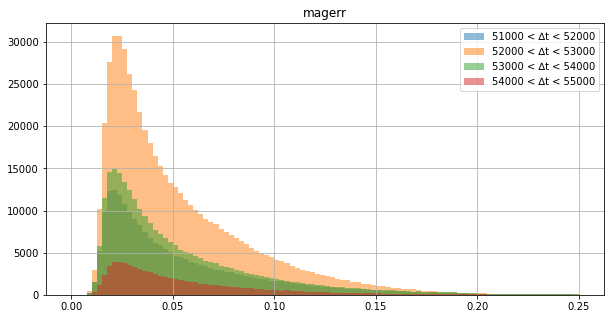

In [62]:
# for mjd1,mjd2 in [(58100,58200),(58200,58300),(58300,58400),(58400,58500),(58500,58600),(58600,58700)]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
# for mjd1,mjd2 in [(51000,51500),(51500,52000),(52000,52500),(52500,53000),(53000,53500),(53500,54000),(54000,54500),(54500,55000)]:
for mjd1,mjd2 in [(51000,52000),(52000,53000),(53000,54000),(54000,55000)]:
    subdf[((mjd1<subdf['mjd']) & (subdf['mjd']<mjd2))].hist('magerr',bins=100, label='{} < ∆t < {}'.format(mjd1,mjd2),ax=ax,alpha=0.5,range=(0,0.25))
ax.legend()
    

In [10]:
dr.df['magerr'].describe()

count    2.217156e+07
mean     1.016233e-01
std      6.140788e-02
min      3.339946e-04
25%      5.100846e-02
50%      9.146633e-02
75%      1.451084e-01
max      4.999382e-01
Name: magerr, dtype: float64

<AxesSubplot:>

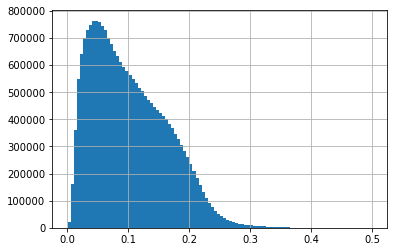

In [65]:
dr.df['magerr'].hist(bins=100)

In [27]:
def save_dtdm_rf(self, uids, time_key):

    sub_df = self.df[[time_key, 'mag', 'magerr', 'catalogue']].loc[uids]

    df = pd.DataFrame(columns=[self.ID, 'dt', 'dm', 'de', 'cat'])
    for uid, group in sub_df.groupby('uid'):
        #maybe groupby then iterrows? faster?
        mjd_mag = group[[time_key,'mag']].values
        magerr = group['magerr'].values
        cat	 = group['catalogue'].values
        n = len(mjd_mag)
        # dtdm defined as: ∆m = (m2 - m1), ∆t = (t2 - t1) where (t1, m1) is the first obs and (t2, m2) is the second obs.
        # Thus a negative ∆m corresponds to a brightening of the object
        unique_pair_indicies = np.triu_indices(n,1)

        dcat = 3*cat + cat[:,np.newaxis]
        dcat = dcat[unique_pair_indicies]

        dtdm = mjd_mag - mjd_mag[:,np.newaxis,:]
        dtdm = dtdm[unique_pair_indicies]
        dtdm = dtdm*np.sign(dtdm[:,0])[:,np.newaxis]

        dmagerr = ( magerr**2 + magerr[:,np.newaxis]**2 )**0.5
        dmagerr = dmagerr[unique_pair_indicies]

        duid = np.full(int(n*(n-1)/2),uid,dtype='uint32')
        # collate data to DataFrame and append
        df = df.append(pd.DataFrame(data={self.ID:duid,'dt':dtdm[:,0],'dm':dtdm[:,1], 'de':dmagerr,'cat':dcat}))

    if (uid % 500 == 0):
        print(uid)

    return df

In [32]:
uids = dr.df.index.unique()

In [45]:
from time import time
# times1 = []
uppers = [10]
for upper in uppers:
    start = time()
    df = save_dtdm_rf_2(dr, uids[:upper], 'mjd_rf')
    end = time()
    duration = end-start
    print('time taken: {:.2f}s'.format(end-start))
#     times.append(duration)

time taken: 146.56s
time taken: 914.33s


In [50]:
print(times1)

[4.55055832862854, 4.713286638259888, 4.857791423797607, 12.604497194290161, 38.84473705291748, 150.85711550712585, 927.8196835517883]


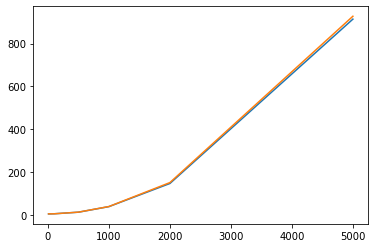

In [46]:
#well I suppose it takes the same amount of time to do dr.df.loc and groupby. Groupby looks nicer so lets go with that
uppers = [10,50,100,500,1000,2000,5000]
times = [4.35,4.64,4.99,12.4,38.4,146.,914.] #.iterrows
times1 = [4.55, 4.71, 4.857, 12.6, 38.8, 150.8, 927.8] # .loc
plt.plot(uppers,times) #2
plt.plot(uppers,times1) #1

In [8]:
bg_qsos = pd.read_csv('/disk1/hrb/quirky_quasars/data/bg92.csv', index_col='bg_id')

In [9]:
len(bg_qsos)

88

In [10]:
bg_uids = [ 76294, 171762, 201673, 204295, 238866, 259047, 260145, 265119,
            337997, 343954, 345712, 383141, 439973, 444240, 452269, 467721,
            492186]
uid = bg_uids[0]

In [27]:
def plot_series(self, uids, survey=None):
    """
    Plot lightcurve of given objects

    Parameters
    ----------
    uids : array_like
            uids of objects to plot
    catalogue : int
            Only plot data from given survey
    survey : 1 = SDSS, 2 = PS, 3 = ZTF

    """
    fig, axes = plt.subplots(len(uids),1,figsize = (20,3*len(uids)), sharex=True)
    if len(uids)==1:
        axes=[axes]

    for uid, ax in zip(uids,axes):
        single_obj = self.df.loc[uid].sort_values('mjd')
        for band in 'ugriz':
            single_band = single_obj[single_obj['filtercode']==band]
            if survey is not None:
                single_band = single_band[single_band['catalogue']==survey]
            for cat in single_band['catalogue'].unique():
                x = single_band[single_band['catalogue']==cat]
                ax.errorbar(x['mjd'], x['mag'], yerr = x['magerr'], lw = 0.5, markersize = 2, marker = self.marker_dict[cat], label = self.survey_dict[cat]+' '+band, color = self.plt_color[band])
        ax.invert_yaxis()
        ax.set(xlabel='mjd', ylabel='mag')
#         ax.legend(loc=1)
        ax.text(0.02, 0.9, 'uid: {}'.format(uid), transform=ax.transAxes, fontsize=10)

    plt.subplots_adjust(hspace=0)

    return fig, ax

In [1]:
len(bg_uids)

NameError: name 'bg_uids' is not defined

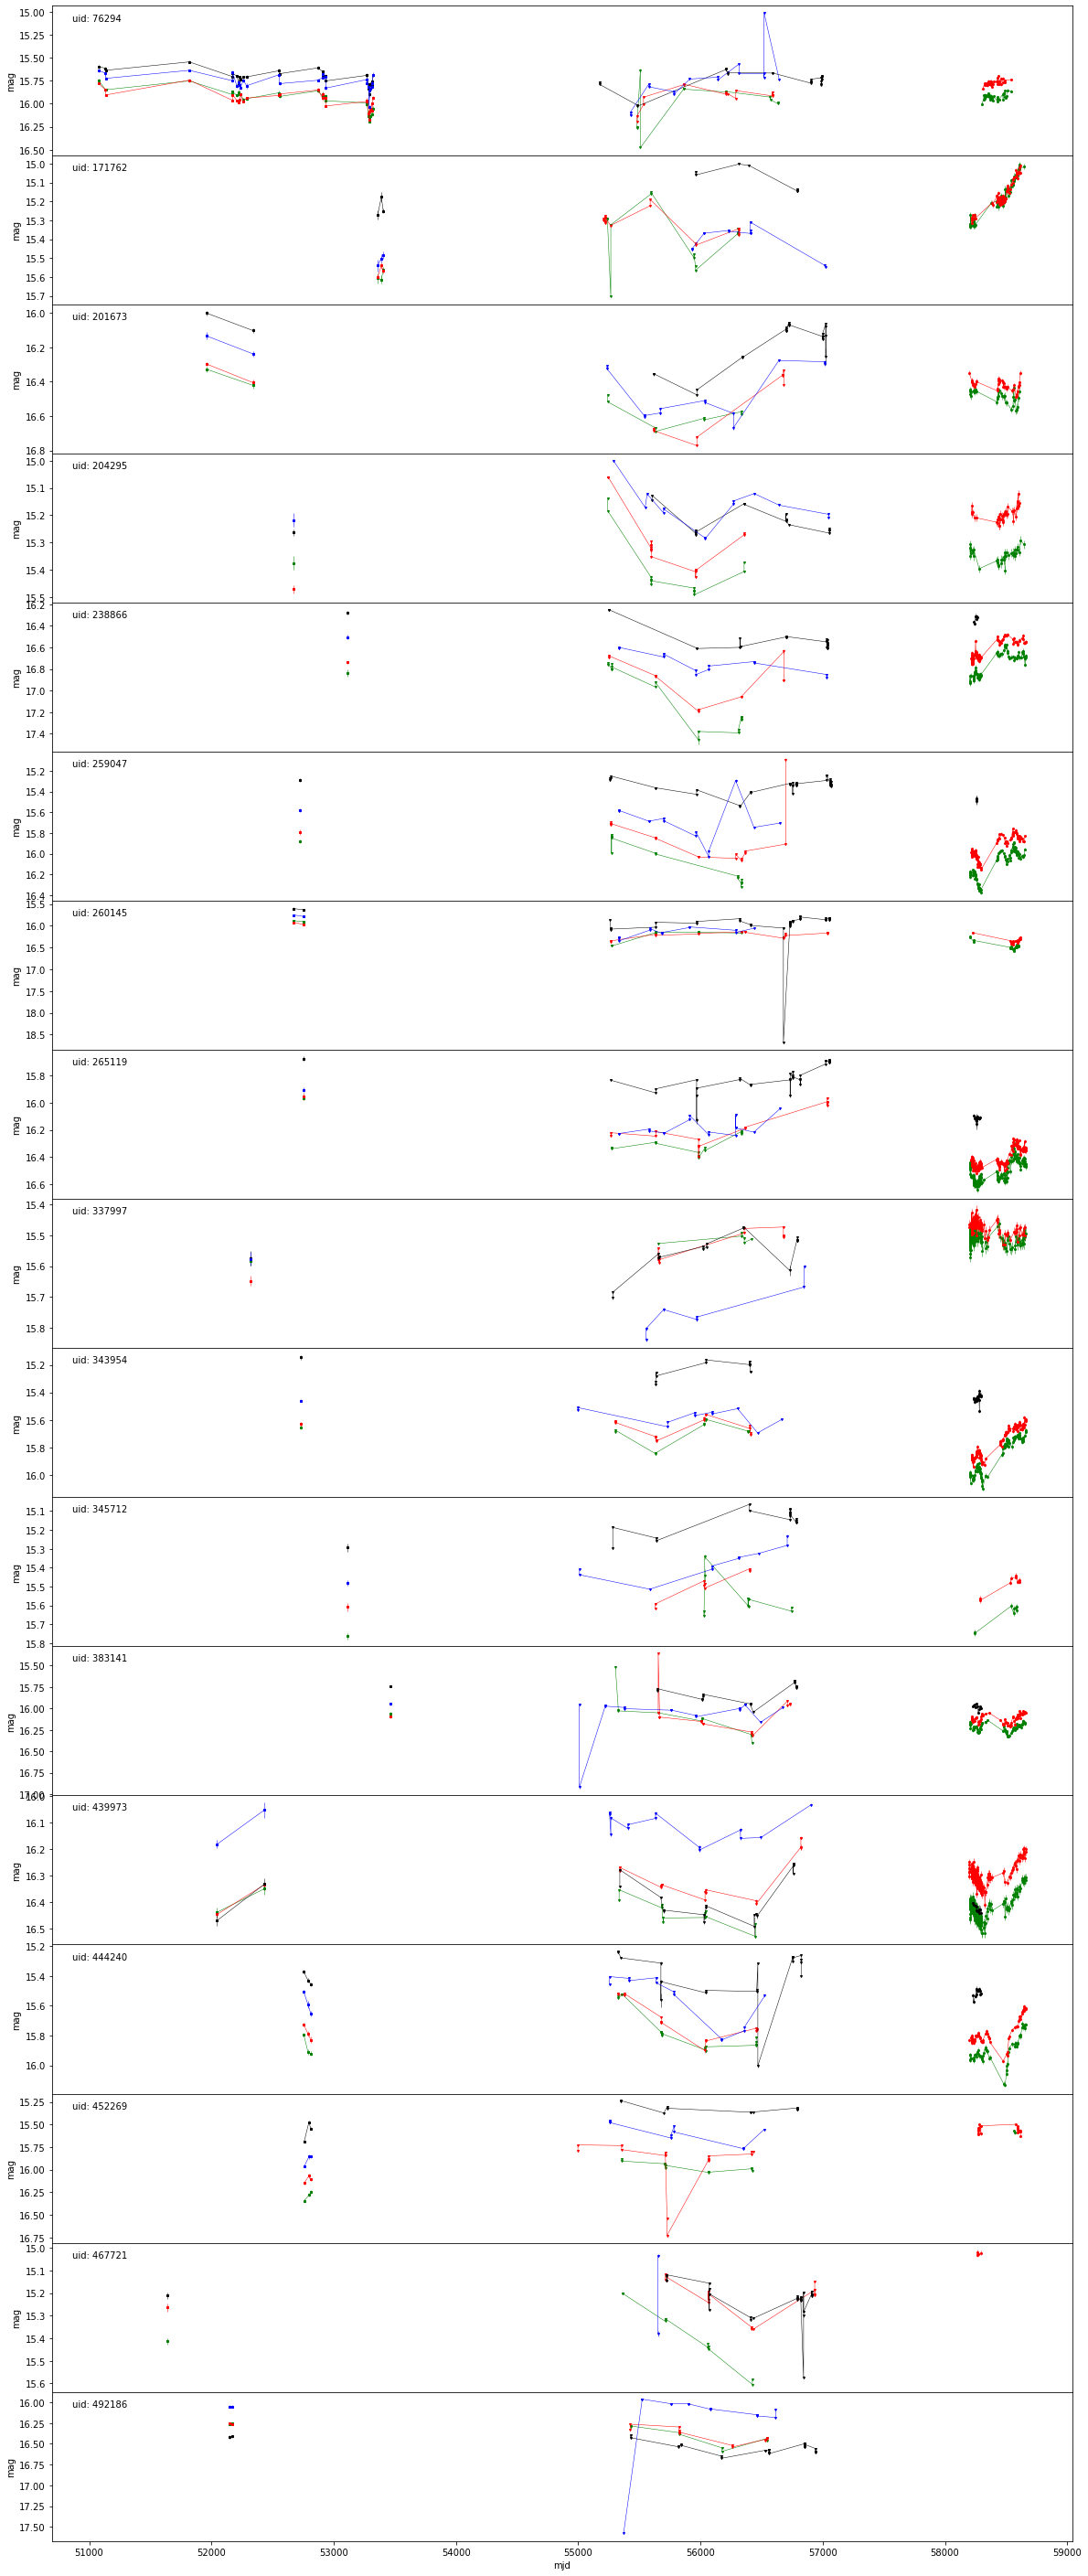

In [28]:
fig, ax = plot_series(dr, bg_uids)

In [30]:
fig.savefig('bg92.pdf', bbox_inches='tight')

### Example: finding qsos given ra, dec

> Define a list of ra and decs in the format below

In [19]:
# ra_dec = [[0.00531, -2.0332],[359.999615, 3.268586], [359.99851, -0.65588]]
ra_dec = bg_qsos[['ra','dec']]

In [20]:
found = dr.search(ra_dec, 1)
print(len(found))
found

AttributeError: 'analysis' object has no attribute 'search'

In [19]:
bg_uids = bg_uids[bg_uids != 260652]

In [12]:
bg_uids = found.index

bg_uids = found.index### Grouped statistics of the photometry

In [6]:
dr.df_grouped

,mag_mean,mag_median,mag_std,mag_count,magerr_mean,mjd_min,mjd_max,mjd_ptp,redshift,mjd_ptp_rf
uid,,,,,,,,,,
1,21.333862,21.334082,0.314814,22,0.175084,54741.371761,58475.144699,3733.772938,2.309000,1128.368975
2,21.201040,21.304075,0.210223,23,0.135964,54747.352476,58487.101042,3739.748566,2.103120,1205.157456
3,20.768782,20.784138,0.190864,36,0.148570,52170.284887,58487.100579,6316.815692,2.497000,1806.352786
4,19.807884,19.816252,0.110648,52,0.079946,54764.193704,58655.441829,3891.248124,1.619000,1485.776298
5,20.816456,20.876451,0.187447,52,0.139620,53271.313403,58657.436319,5386.122916,1.616210,2058.749985
...,...,...,...,...,...,...,...,...,...,...
526352,21.296242,21.357853,0.260565,32,0.170418,52909.369624,58486.100787,5576.731163,2.452000,1615.507289
526353,19.997482,19.990170,0.130685,75,0.083262,52909.353868,58657.434954,5748.081086,3.109000,1398.900240
526354,19.001686,19.024576,0.137761,62,0.048165,54741.213069,58655.441829,3914.228759,1.233161,1752.774916


### Load DR12 VAC catalogue

In [7]:
dr.merge_with_catalogue(catalogue='dr12_vac', remove_outliers=True, prop_range_any = {'MBH_MgII':(6,12), 'MBH_CIV':(6,12)})

FileNotFoundError: [Errno 2] No such file or directory: '/disk1/hrb/python/data/catalogues/SDSS_DR12Q_BH_matched.csv'

> Columns included in the value added catalogue:

In [ ]:
list(dr.properties.columns)

In [ ]:
dr.properties

In [20]:
output_notebook()

Loading BokehJS ...

> Example: plot photometry of quasars with uid: [6, 526352, 526344] (currently only r band)

In [21]:
dr.plot_series_bokeh(bg_uids)